In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import splat
import astropy.units as u
import popsims
splat.initializeStandards(all=True)
from scipy import interpolate
from tqdm import tqdm
from astropy.table import Table

%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#read in aurora files
#import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron
files=glob.glob('/volumes/LaCie/AuroraTemplates/*.fits')

In [3]:
def get_spectrum(f):
        spec_data=Table(fits.open(f)[1].data).to_pandas()
        phot_data=(Table(fits.open(f)[-1].data).to_pandas()).to_dict()
        spec_type=f.split('/')[-1].split('.fits')[0]
        wave=(10**spec_data.LogLam.values)*WUNITS/10000
        flux=spec_data.Flux.values*FUNITS
        noise=spec_data.PropErr.values*FUNITS
        s=splat.Spectrum(wave=wave, flux=flux, noise=noise, name=f)
        
        return {'spectrum': s,
                'spectype': spec_type,
                'phot': phot_data}

In [4]:
spectra=pd.DataFrame([ get_spectrum(f) for f in tqdm(files)])

100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.73it/s]


In [5]:
 def is_dwarf_aurora(x):
    sx= x.split('_')
    if len(sx)==1:
        return True
    else:
        return sx[1].startswith('+')
    
def proper_spectral_type(x):
    sx= x.split('_')
    return sx[0]

In [6]:
spectra['is_dwarf']=spectra.spectype.apply(is_dwarf_aurora)
spectra['proper_type']=spectra.spectype.apply(proper_spectral_type)

In [7]:
spectra

,spectrum,spectype,phot,is_dwarf,proper_type
0,spectrum of /volumes/LaCie/AuroraTemplates/L0...,L0,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L0
1,spectrum of /volumes/LaCie/AuroraTemplates/L1...,L1,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L1
2,spectrum of /volumes/LaCie/AuroraTemplates/L6...,L6,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L6
3,spectrum of /volumes/LaCie/AuroraTemplates/L2...,L2,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L2
4,spectrum of /volumes/LaCie/AuroraTemplates/L3...,L3,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L3
5,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+0.0_Dwarf,"{'u-g': {0: 2.4598464965820312, 1: 0.012154936...",True,M0
6,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+0.5_Dwarf,"{'u-g': {0: 2.5878138542175293, 1: 0.011759408...",True,M0
7,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+1.0_Dwarf,"{'u-g': {0: 2.844008684158325, 1: 0.0408333800...",True,M0
8,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_Giant,"{'u-g': {0: 2.9665489196777344, 1: 0.096475265...",False,M0
9,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_-0.5_Dwarf,"{'u-g': {0: 2.385930061340332, 1: 0.0714462026...",False,M0


In [8]:
spectra.to_pickle(popsims.DATA_FOLDER+'/aurora_templates.pkl')

[(-1.0, 5.0)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


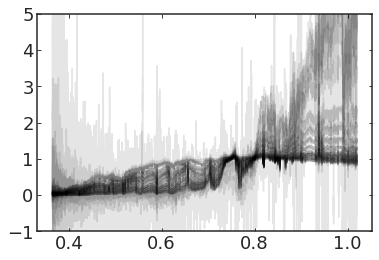

In [9]:
fig, ax=plt.subplots()
for a in spectra.spectrum.values:
    ax.plot(a.wave, a.flux, alpha=0.1, c='k')
ax.set(ylim=[-1, 5])